<h1>Importing libraries necessary</h1>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets, metrics
import matplotlib.pyplot  as plt
from numpy import loadtxt
from keras.models import Sequential # reasoning of using sequential is that offers an intuite way of build simple neural networks
from keras.layers import Dense# reasoning of using dense is essential to build deep learning models as it is used to learn complex patterns and relationship in data
import keras
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
dataset = pd.read_csv("C:/Users/Erick/Downloads/BankRecords.csv");

In [3]:
dataset.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [4]:
dataset.describe()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


<h3>iloc is method for the location based on index of the dataset</h3> 

In [5]:
X = dataset.iloc[:,0:13]
y = dataset.iloc[:,13]

In [6]:
dataset.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


<h3>Dropping irrelevant table for the data set</h3>

In [7]:
# Clean: Drop ID and Sort Code
dataset.drop(["ID", "Sort Code"], axis=1, inplace=True)

 Fix negative experience values just avoid -1 year of experience

In [8]:
# Fix negative experience values
dataset["Experience(Years)"] = dataset["Experience(Years)"].apply(lambda x: np.nan if x < 0 else x)
dataset["Experience(Years)"].fillna(dataset["Experience(Years)"].median(), inplace=True)

<h3>Transforming any yes/no answer  to binary in order to train the dataset</h3>

In [9]:
# Encode Yes/No binary columns
binary_cols = ["Personal Loan", "Securities Account", "CD Account", "Online Banking", "CreditCard"]
for col in binary_cols:
    dataset[col] = dataset[col].map({"Yes": 1, "No": 0})

<h3>Our target variable will be the Income Thousand, creating feature and target to be able to make some predictions from possible outcome from customers </h3>

In [10]:
# Separate features and target
X = dataset.drop("Income(Thousands's)", axis=1)
y = dataset["Income(Thousands's)"]

<h6>Defining any possible numerical and categorical values</h6>

In [11]:
# Identify numeric and categorical features
num_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_features = ["Education"]

<h3> Splitting the train/test sets avoind data leakage, encoding categorical and scaling the  using pipeline to do so,  transforming the dataset </h3>

In [12]:
# Split data (raw)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_features)
])

# Fit only on training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform test data
X_test_processed = preprocessor.transform(X_test)


<h3>using the rectified linear unit activation function outputs the input directly if it's positive, and zero otherwise.  </h3>

In [13]:
# Build Neural Network model
model = Sequential()
model.add(Dense(250, input_dim=X_train_processed.shape[1], activation="relu"))
model.add(Dense(250, activation="relu"))
model.add(Dense(1))  # Linear output for regression


<h3>Compile the model with the Regression Algorithm</h3>

In [14]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mae"])

<h3>Using epoch refers to one complete pass through the entire training dataset during the model training process. It's a measure of how many times the learning algorithm processes all the training examples</h3>

In [15]:
# Train the model
model.fit(X_train_processed, y_train, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
400/400 - 1s - 3ms/step - loss: 1650.6171 - mae: 29.9254
Epoch 2/100
400/400 - 0s - 1ms/step - loss: 867.8024 - mae: 23.2917
Epoch 3/100
400/400 - 0s - 1ms/step - loss: 829.3723 - mae: 22.6669
Epoch 4/100
400/400 - 0s - 1ms/step - loss: 812.6515 - mae: 22.4100
Epoch 5/100
400/400 - 0s - 1ms/step - loss: 803.0910 - mae: 22.2018
Epoch 6/100
400/400 - 0s - 1ms/step - loss: 790.5774 - mae: 22.0179
Epoch 7/100
400/400 - 0s - 1ms/step - loss: 787.8076 - mae: 21.9374
Epoch 8/100
400/400 - 0s - 1ms/step - loss: 782.7612 - mae: 21.8757
Epoch 9/100
400/400 - 0s - 1ms/step - loss: 777.9111 - mae: 21.7097
Epoch 10/100
400/400 - 0s - 1ms/step - loss: 767.7758 - mae: 21.6344
Epoch 11/100
400/400 - 0s - 1ms/step - loss: 764.4451 - mae: 21.5342
Epoch 12/100
400/400 - 0s - 1ms/step - loss: 758.6920 - mae: 21.5072
Epoch 13/100
400/400 - 0s - 1ms/step - loss: 756.4586 - mae: 21.3865
Epoch 14/100
400/400 - 0s - 1ms/step - loss: 747.2422 - mae: 21.2735
Epoch 15/100
400/400 - 0s - 1ms/step - los

In [16]:
scores = model.evaluate(X_test_processed, y_test, verbose=2)
print(f"{model.metrics_names[1]}: {scores[1]:.2f}")

32/32 - 0s - 5ms/step - loss: 713.5648 - mae: 20.6213
compile_metrics: 20.62


In [17]:
prediction = model.predict(X_test_processed)
print(prediction)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
[[ 30.558506 ]
 [146.77158  ]
 [151.51996  ]
 [ 64.56734  ]
 [ 34.662014 ]
 [ 74.95617  ]
 [160.5563   ]
 [152.5303   ]
 [ 38.84344  ]
 [143.08324  ]
 [ 41.520466 ]
 [ 82.83605  ]
 [140.87932  ]
 [ 49.636223 ]
 [141.03496  ]
 [ 98.82824  ]
 [ 78.264206 ]
 [113.13796  ]
 [ 40.053173 ]
 [177.32161  ]
 [ 26.624784 ]
 [110.569176 ]
 [ 31.78083  ]
 [ 82.37015  ]
 [ 62.34851  ]
 [ 69.10983  ]
 [ 78.26082  ]
 [132.99274  ]
 [130.03441  ]
 [103.28587  ]
 [172.62521  ]
 [ 38.35082  ]
 [183.30406  ]
 [126.515686 ]
 [ 75.18143  ]
 [ 53.48797  ]
 [ 49.413544 ]
 [ 56.919125 ]
 [ 25.669577 ]
 [ 52.6733   ]
 [ 23.230362 ]
 [ 79.30801  ]
 [141.27203  ]
 [129.39386  ]
 [ 77.44095  ]
 [ 58.610126 ]
 [ 78.04661  ]
 [ 93.07072  ]
 [161.27536  ]
 [ 45.387966 ]
 [ 52.43495  ]
 [158.26077  ]
 [109.44502  ]
 [ 91.33086  ]
 [ 83.67766  ]
 [ 49.71788  ]
 [ 34.994926 ]
 [ 35.48056  ]
 [ 27.562836 ]
 [149.82178  ]
 [145.51274  ]
 [ 31.257164 ]
 [ 77.25655  ]
 [ 67.948    ]


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


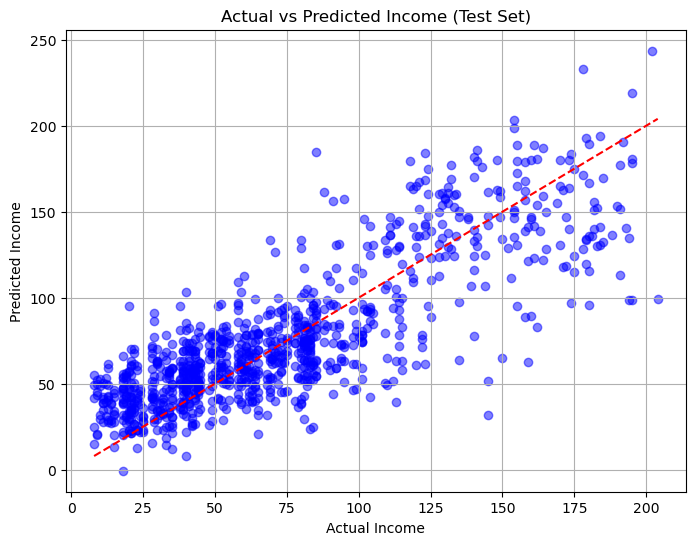

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test_processed).flatten()

# Plot actual vs predicted for the test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title("Actual vs Predicted Income (Test Set)")
plt.grid(True)
plt.show()


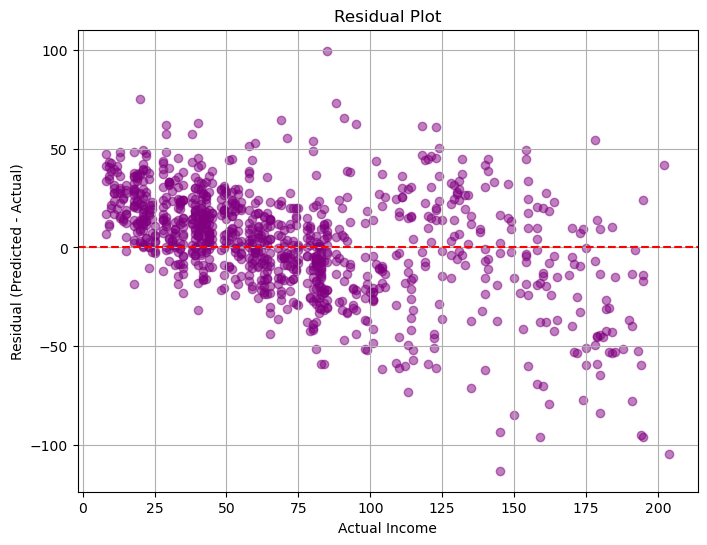

In [19]:
# Residuals = Predicted - Actual
residuals = y_pred - y_test

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals, alpha=0.5, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Income")
plt.ylabel("Residual (Predicted - Actual)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [20]:
# Define new customer data (must match original feature structure!)
new_customer = pd.DataFrame([{
    "Age": 45,
    "Experience(Years)": 20,
    "Family": 3,
    "Credit Score": 2.0,
    "Education": "Degree",
    "Mortgage(Thousands's)": 150,
    "Personal Loan": 1,
    "Securities Account": 0,
    "CD Account": 1,
    "Online Banking": 1,
    "CreditCard": 1
}])

# Preprocess new data
new_customer_processed = preprocessor.transform(new_customer)

# Predict income
predicted_income = model.predict(new_customer_processed)

print(f"\n Predicted Income for New Customer: {predicted_income[0][0]:.2f} Thousands")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

 Predicted Income for New Customer: 153.08 Thousands


In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation
import nltk
from nltk.corpus import stopwords
#nltk.download('stopwords')
from sklearn import datasets, metrics


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [22]:
dataset_1 = pd.read_csv("C:/Users/Erick/Downloads/synthetic_social_media_data.csv");

In [23]:
dataset_1.head()

,Post ID,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language
0,aa391375-7355-44b7-bcbf-97fb4e5a2ba3,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr
1,1c9ec98d-437a-48d9-9cba-bd5ad853c59a,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es
2,170e5b5b-1d9a-4d02-a957-93c4dbb18908,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de
3,aec53496-60ee-4a06-8821-093a04dc8770,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de
4,4eacddb7-990d-4056-8784-7e1d5c4d1404,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de


In [24]:
dataset_1 = dataset_1.drop('Post ID', axis=1)

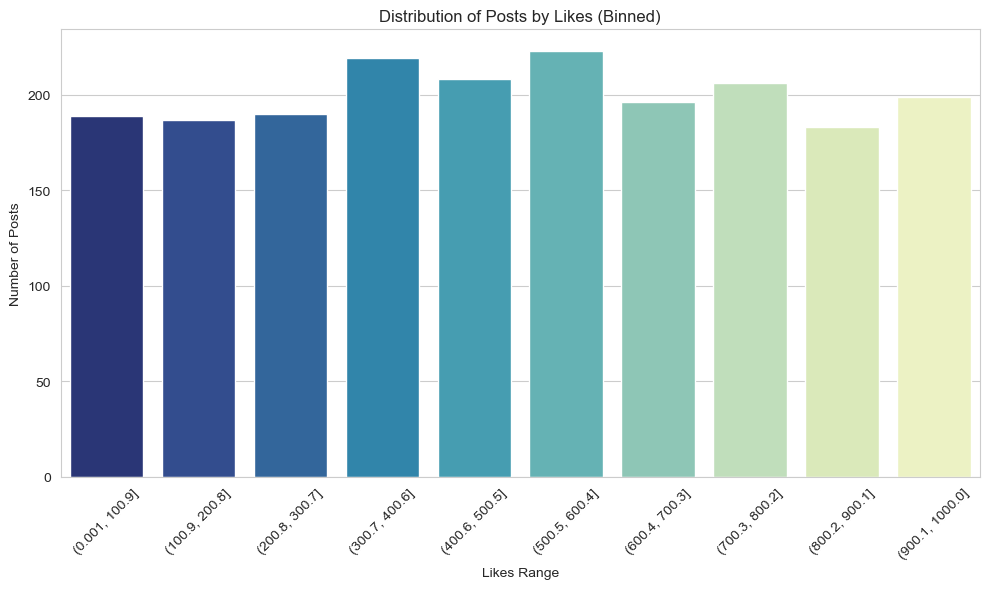

In [25]:
# Create binned ranges of likes
dataset_1["Likes Bin"] = pd.cut(dataset_1["Number of Likes"], bins=10)

# Plot count of posts per likes bin
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(x="Likes Bin", data=dataset_1, palette="YlGnBu_r")
plt.xticks(rotation=45)
plt.title("Distribution of Posts by Likes (Binned)")
plt.xlabel("Likes Range")
plt.ylabel("Number of Posts")
plt.tight_layout()
plt.show()


<Axes: xlabel='Sentiment Label', ylabel='count'>

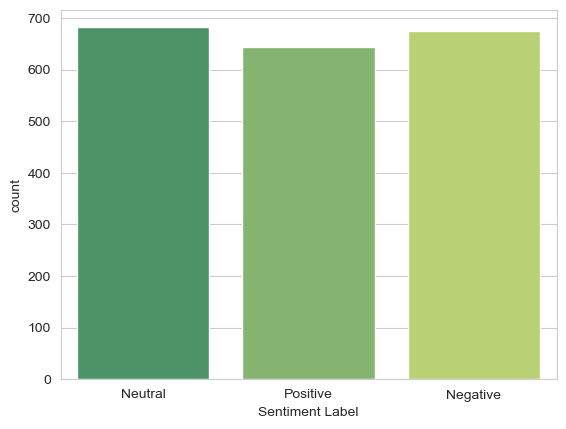

In [26]:
sns.set_style('whitegrid')
sns.countplot(x='Sentiment Label',data=dataset_1, palette='summer')

<h3>Text Preprocessing</h3>

In [27]:
def get_text_processing(text):
    stpword = stopwords.words('english')
    no_punctuation = [char for char in text if char not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return ' '.join([word for word in no_punctuation.split() if word.lower() not in stpword])

In [28]:
dataset_1['Post Content Text'] = dataset_1['Post Content'].apply(get_text_processing)
dataset_1.head()

,Post Content,Sentiment Label,Number of Likes,Number of Shares,Number of Comments,User Follower Count,Post Date and Time,Post Type,Language,Likes Bin,Post Content Text
0,Word who nor center everything better politica...,Neutral,157,243,64,4921,2024-01-10 00:14:21,video,fr,"(100.9, 200.8]",Word center everything better political Variou...
1,Begin administration population good president...,Positive,166,49,121,612,2024-02-03 00:20:11,image,es,"(100.9, 200.8]",Begin administration population good president...
2,Thousand total sign. Agree product relationshi...,Positive,185,224,179,9441,2024-07-25 14:20:23,video,de,"(100.9, 200.8]",Thousand total sign Agree product relationship...
3,Individual from news third. Oil forget them di...,Neutral,851,369,39,6251,2024-02-20 09:15:09,text,de,"(800.2, 900.1]",Individual news third Oil forget different acc...
4,Time adult letter see reduce. Attention sudden...,Negative,709,356,52,1285,2024-03-01 04:17:35,image,de,"(700.3, 800.2]",Time adult letter see reduce Attention suddenl...


In [29]:
dataset_1 = dataset_1[['Post Content Text', 'Sentiment Label']]
dataset_1.head()

,Post Content Text,Sentiment Label
0,Word center everything better political Variou...,Neutral
1,Begin administration population good president...,Positive
2,Thousand total sign Agree product relationship...,Positive
3,Individual news third Oil forget different acc...,Neutral
4,Time adult letter see reduce Attention suddenl...,Negative


In [30]:
dataset_1.shape

(2000, 2)

<h3>Apply one hot encoding on Negative, Neutral and Positive</h3>

In [31]:
one_hot = pd.get_dummies(dataset_1['Sentiment Label'])
dataset_1.drop(['Sentiment Label'],axis=1,inplace=True)
dataset_1 = pd.concat([dataset_1,one_hot],axis=1)
dataset_1[['Negative', 'Neutral', 'Positive']] = dataset_1[['Negative', 'Neutral', 'Positive']].astype(int)


<h3>Applying Train Test Split</h3>

In [32]:
X = dataset_1['Post Content Text'].values
y = dataset_1.drop('Post Content Text', axis=1).values



X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)


<h3>Applying Vectorization</h3>

In [33]:
vect = CountVectorizer()
X_train = vect.fit_transform(X_train)
X_test = vect.transform(X_test)

<h3>Applying frequency, inverse document frequency</h3>

In [34]:
tfidf = TfidfTransformer()
X_train = tfidf.fit_transform(X_train)
X_test = tfidf.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

<h3>Adding different layers</h3>

In [41]:
model = Sequential()

model.add(Dense(units=512,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=256,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=3, activation='softmax'))

opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

<h3>Fit the Model</h3>

In [42]:
model.fit(x=X_train, y=y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1, callbacks=early_stop)

Epoch 1/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3372 - loss: 1.1001 - val_accuracy: 0.3333 - val_loss: 1.0990
Epoch 2/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3537 - loss: 1.1009 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 3/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3233 - loss: 1.1030 - val_accuracy: 0.3317 - val_loss: 1.0985
Epoch 4/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.3505 - loss: 1.0983 - val_accuracy: 0.3283 - val_loss: 1.0982
Epoch 5/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3552 - loss: 1.0972 - val_accuracy: 0.3333 - val_loss: 1.0981
Epoch 6/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3450 - loss: 1.0975 - val_accuracy: 0.3317 - val_loss: 1.0980
Epoch 7/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3555 - loss: 1.0986 - val_accuracy: 0.3417 - val_loss: 1.0979
Epoch 8/100
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3407 - loss: 1.0984 - val_accuracy: 0.3467 - val_loss:

In [43]:
model_score = model.evaluate(X_test, y_test, batch_size=64, verbose=1)
print('Test accuracy:', model_score[1])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3584 - loss: 1.0975 
Test accuracy: 0.3400000035762787


In [38]:
preds = model.predict(X_test)
preds

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.33854195, 0.33266774, 0.3287903 ],
       [0.3346562 , 0.33476636, 0.3305775 ],
       [0.33694834, 0.33284822, 0.3302034 ],
       ...,
       [0.33685628, 0.3364484 , 0.3266953 ],
       [0.34660554, 0.32698438, 0.3264101 ],
       [0.34852245, 0.3372378 , 0.31423968]], dtype=float32)

In [39]:
preds.shape

(600, 3)

<h1>References:</h1>

<h6>https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download</h6>

In [40]:
print(X_train.shape)


(1400, 869)
